In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [3]:
os.chdir(r"D:\KAGGLE DS\store sales")
train=pd.read_csv("train.csv")
holidays_events=pd.read_csv("holidays_events.csv")
oil=pd.read_csv("oil.csv")
stores=pd.read_csv("stores.csv")
transactions=pd.read_csv('transactions.csv')
test=pd.read_csv('test.csv')

In [4]:
train.info()  #there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1048575 non-null  int64  
 1   date         1048575 non-null  object 
 2   store_nbr    1048575 non-null  int64  
 3   family       1048575 non-null  object 
 4   sales        1048575 non-null  float64
 5   onpromotion  1048575 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 48.0+ MB


In [5]:
train.describe

<bound method NDFrame.describe of               id        date  store_nbr                      family    sales  \
0              0  01-01-2013          1                  AUTOMOTIVE    0.000   
1              1  01-01-2013          1                   BABY CARE    0.000   
2              2  01-01-2013          1                      BEAUTY    0.000   
3              3  01-01-2013          1                   BEVERAGES    0.000   
4              4  01-01-2013          1                       BOOKS    0.000   
...          ...         ...        ...                         ...      ...   
1048570  1048570  13-08-2014          3                     POULTRY  974.098   
1048571  1048571  13-08-2014          3              PREPARED FOODS  324.293   
1048572  1048572  13-08-2014          3                     PRODUCE   10.000   
1048573  1048573  13-08-2014          3  SCHOOL AND OFFICE SUPPLIES    0.000   
1048574  1048574  13-08-2014          3                     SEAFOOD   69.116   

     

In [6]:
train.describe()

,id,store_nbr,sales,onpromotion
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+05,2.749256e+01,2.445326e+02,1.147634e-01
std,3.026977e+05,1.558408e+01,8.065892e+02,2.377814e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.621435e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,5.242870e+05,2.700000e+01,1.000000e+00,0.000000e+00
75%,7.864305e+05,4.100000e+01,1.200000e+02,0.000000e+00
max,1.048574e+06,5.400000e+01,4.627100e+04,1.960000e+02


In [7]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,01-01-2013,1,AUTOMOTIVE,0.0,0
1,1,01-01-2013,1,BABY CARE,0.0,0
2,2,01-01-2013,1,BEAUTY,0.0,0
3,3,01-01-2013,1,BEVERAGES,0.0,0
4,4,01-01-2013,1,BOOKS,0.0,0


In [8]:
train['family'].nunique()   #finding unique families

33

In [9]:
train['store_nbr'].nunique()  #finding different stores 

54

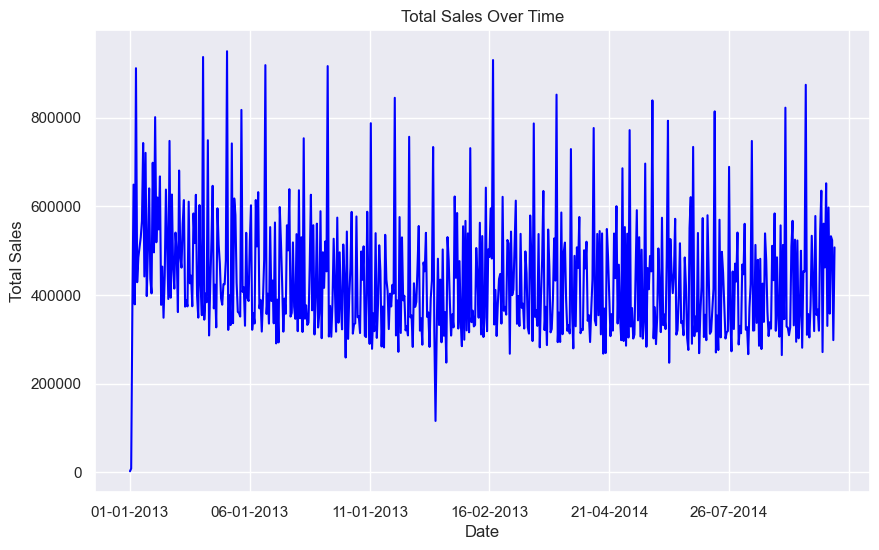

In [10]:
#plotting the total sales
plt.figure(figsize=(10, 6))
train.groupby('date')['sales'].sum().plot(color='blue')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [11]:
x=train['onpromotion']
y=train['sales']
x0=sm.add_constant(x)
results=sm.OLS(y,x0).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     8393.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:57:58   Log-Likelihood:            -8.5016e+06
No. Observations:             1048575   AIC:                         1.700e+07
Df Residuals:                 1048573   BIC:                         1.700e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         241.0636      0.785    306.906      0.000     239.524     242.603
onpromotion    30.2274      0.330     91.613      0.000      29.581      30.874
==============================================================================
Omnibus:                  1353971.219   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        308605197.800
Skew:                           7.202   Prob(JB):                         0.00
Kurtosis:                      85.801   Cond. No.                         2.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

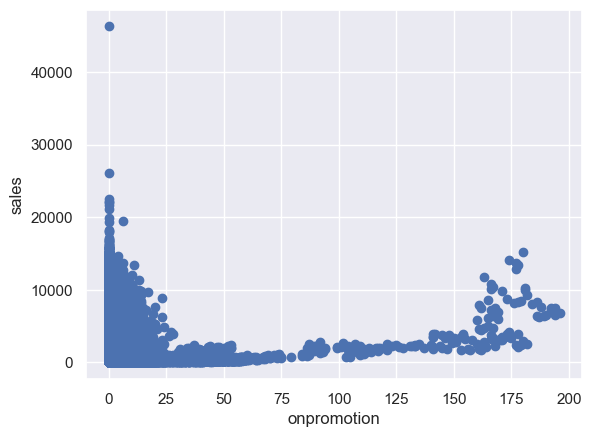

In [12]:
plt.scatter(x,y)
plt.xlabel('onpromotion')
plt.ylabel('sales')
plt.show()

In [13]:
family_sales=train.groupby('family')['sales'].sum().sort_values()

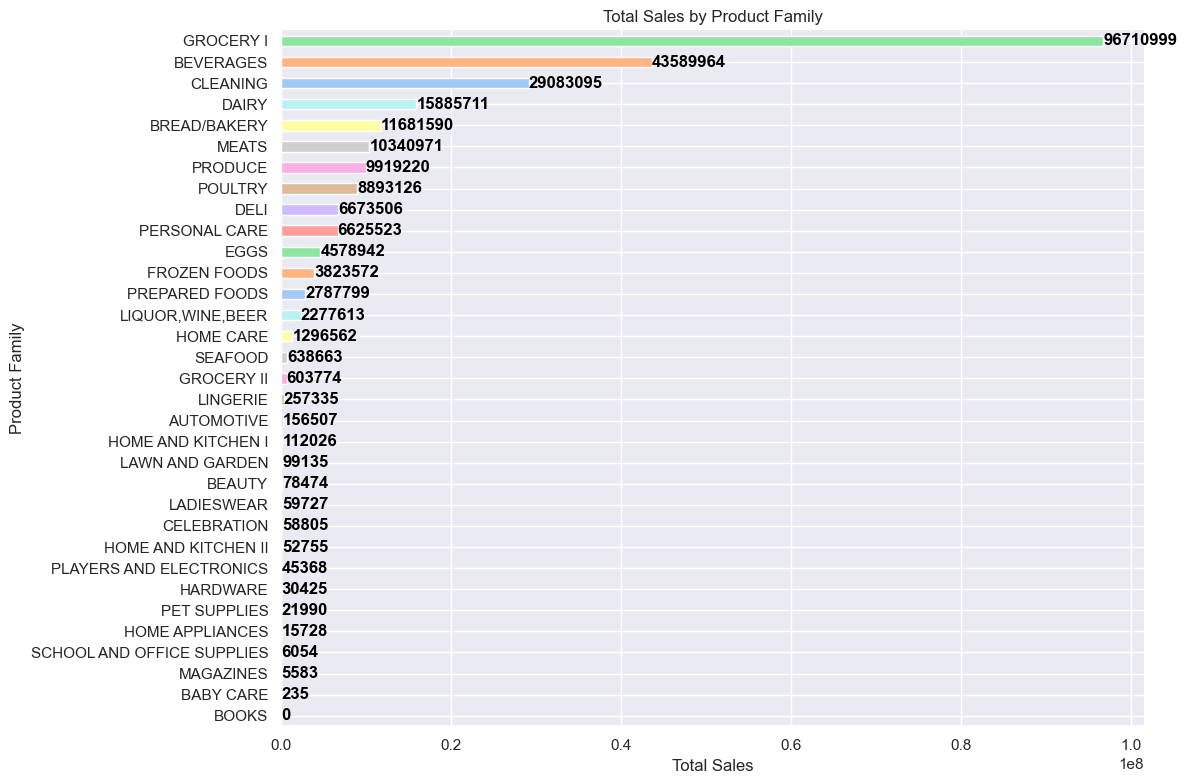

In [14]:
plt.figure(figsize=(12, 8))

# Use Seaborn's color palette for better color choices
colors = sns.color_palette('pastel', len(family_sales))

family_sales.plot(kind='barh', color=colors)
plt.ylabel('Product Family')
plt.xlabel('Total Sales')
plt.title('Total Sales by Product Family')

# Add data labels to the right of each bar
for i, v in enumerate(family_sales):
    plt.text(v + 10, i, str(int(v)), color='black', va='center', fontsize=12, fontweight='bold')

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


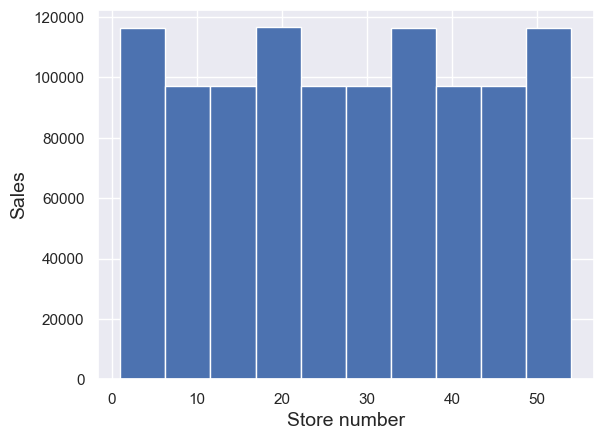

In [15]:
x=train['store_nbr']
y=train['sales']
plt.hist(train['store_nbr'], bins = 10)
plt.ylabel("Sales",fontsize=14)
plt.xlabel("Store number", fontsize=14)
plt.show()

In [16]:
s=train['sales'].sum()
s

256410781.76554966

In [17]:
transactions.head()

,date,store_nbr,transactions
0,01-01-2013,25,770
1,02-01-2013,1,2111
2,02-01-2013,2,2358
3,02-01-2013,3,3487
4,02-01-2013,4,1922


In [18]:
#checking for null values in transactions
data=transactions.copy()
data.isnull()

,date,store_nbr,transactions
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
83483,False,False,False
83484,False,False,False
83485,False,False,False
83486,False,False,False


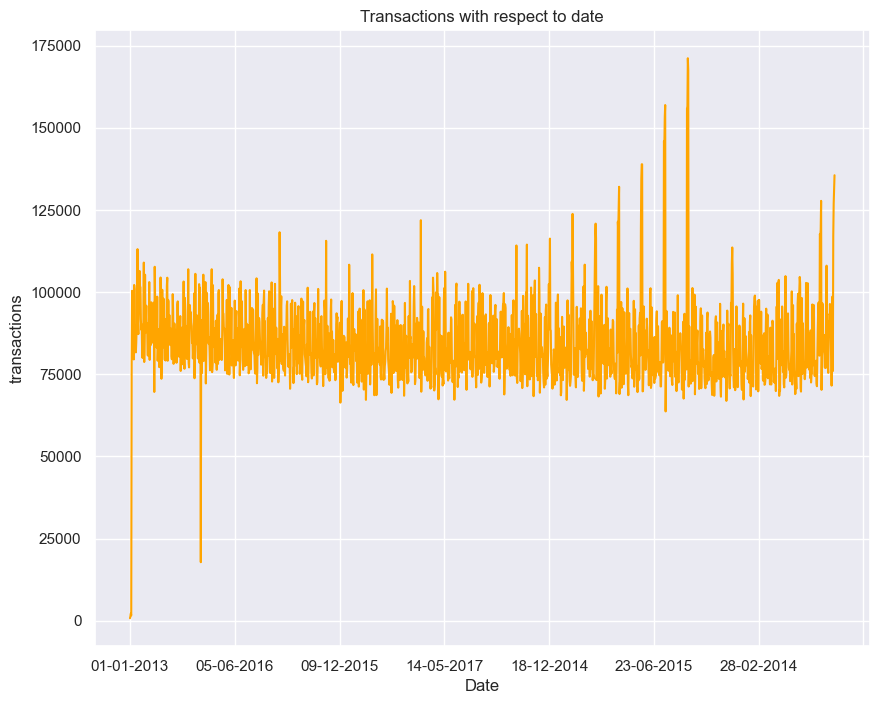

In [19]:
#overall transactions that are done in a particular date
plt.figure(figsize=(10,8))
transactions.groupby('date')['transactions'].sum().plot(color='orange')
plt.title('Transactions with respect to date')
plt.xlabel('Date')
plt.ylabel('transactions')
plt.show()

In [20]:
#find total transactions for each store number
store_transactions=transactions.groupby('store_nbr',as_index=False)['transactions'].sum()

In [21]:
store_transactions.head()

,store_nbr,transactions
0,1,2553963
1,2,3219901
2,3,5366350
3,4,2519007
4,5,2347877


In [22]:
type(store_transactions)

pandas.core.frame.DataFrame

In [23]:
df=pd.DataFrame(store_transactions)
df.head()

,store_nbr,transactions
0,1,2553963
1,2,3219901
2,3,5366350
3,4,2519007
4,5,2347877


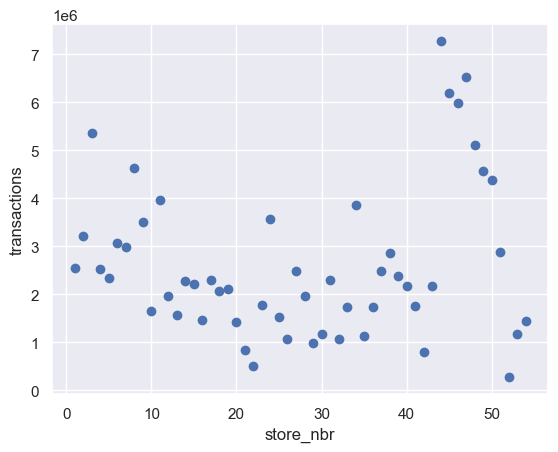

In [24]:
x=df['store_nbr']
y=df['transactions']
plt.scatter(x,y)
plt.xlabel('store_nbr')
plt.ylabel('transactions')
plt.show()

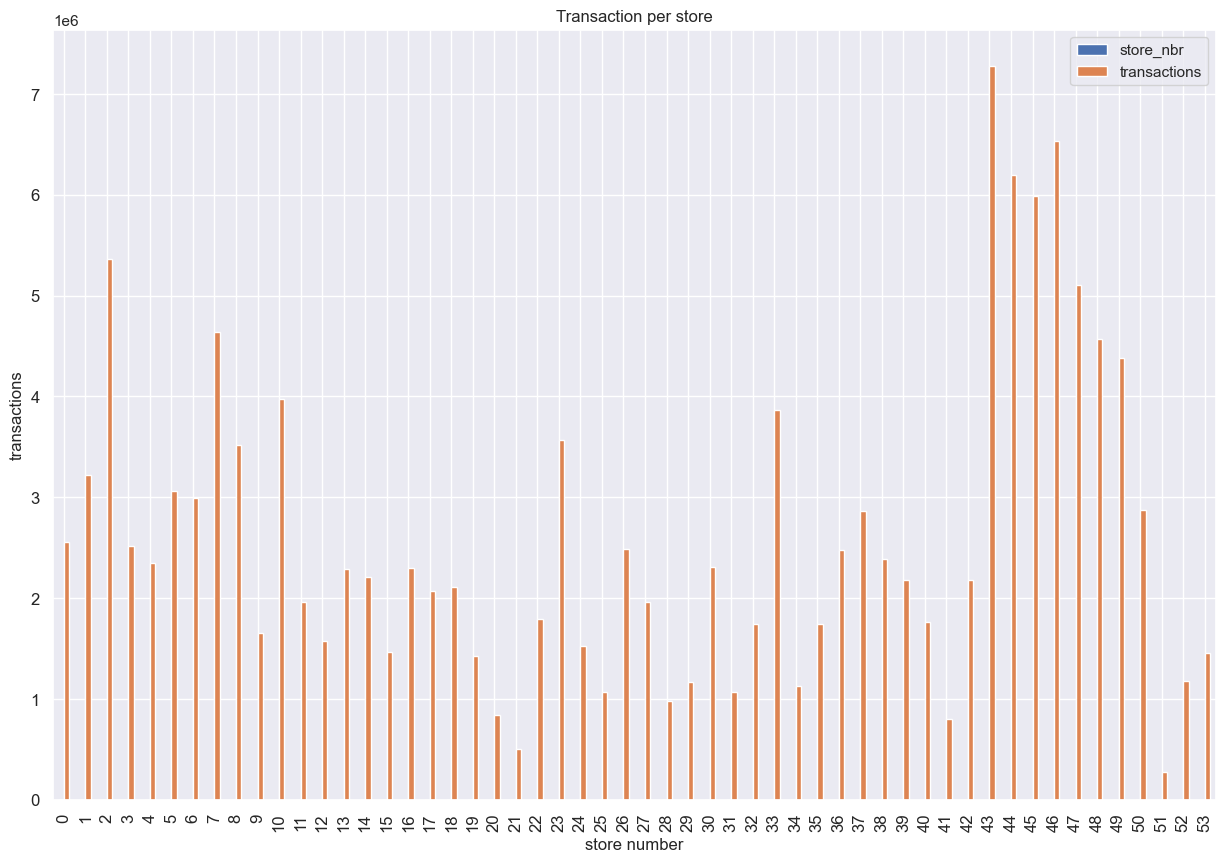

In [25]:
ax = df[['store_nbr','transactions']].plot(kind='bar', title ="Transaction per store", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("store number", fontsize=12)
ax.set_ylabel("transactions", fontsize=12)
plt.show()

In [26]:
#from transaction and train it is clear that transaction is depending on sales more sale more transactions
transact_sale=pd.DataFrame()
transact_sale['sales']=train['sales']
transact_sale['transactions']=transactions['transactions']

In [27]:
transact_sale.head()

,sales,transactions
0,0.0,770.0
1,0.0,2111.0
2,0.0,2358.0
3,0.0,3487.0
4,0.0,1922.0


In [28]:
transact_sale.isnull()

,sales,transactions
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1048570,False,True
1048571,False,True
1048572,False,True
1048573,False,True


In [29]:
#replaced null values with 0
transact_sale['transactions']=transact_sale['transactions'].fillna(0)
transact_sale.isnull()

,sales,transactions
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1048570,False,False
1048571,False,False
1048572,False,False
1048573,False,False


In [30]:
y=transact_sale['transactions']
x1=transact_sale['sales']

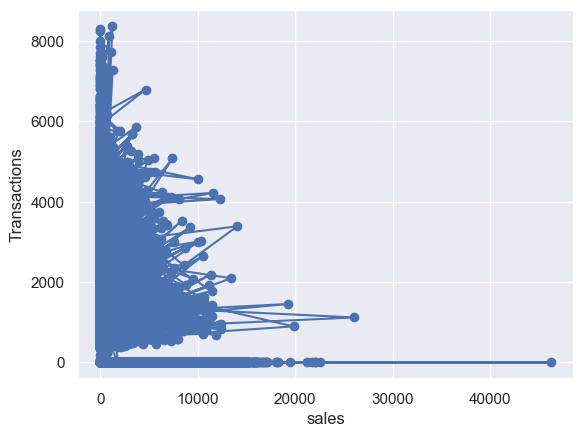

In [31]:
plt.scatter(x1,y)
fig=plt.plot(x1,y)
plt.xlabel('sales')
plt.ylabel('Transactions')
plt.show()

In [32]:
x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           transactions   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     308.7
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           4.32e-69
Time:                        23:58:12   Log-Likelihood:            -8.0716e+06
No. Observations:             1048575   AIC:                         1.614e+07
Df Residuals:                 1048573   BIC:                         1.614e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.6982      0.544    253.101      0.000     136.632     138.764
sales         -0.0113      0.001    -17.569      0.000      -0.013      -0.010
==============================================================================
Omnibus:                  1025136.580   Durbin-Watson:                   0.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         41638812.763
Skew:                           4.969   Prob(JB):                         0.00
Kurtosis:                      32.228   Cond. No.                         881.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
transactions_promotion=pd.DataFrame()
transactions_promotion['sales']=train['sales']
transactions_promotion['onpromotion']=train['onpromotion']
transactions_promotion['store_nbr']=train['store_nbr']
transactions_promotion['transactions']=transactions['transactions']
transactions_promotion.head()

,sales,onpromotion,store_nbr,transactions
0,0.0,0,1,770.0
1,0.0,0,1,2111.0
2,0.0,0,1,2358.0
3,0.0,0,1,3487.0
4,0.0,0,1,1922.0


In [35]:
transactions_promotion.isnull()

,sales,onpromotion,store_nbr,transactions
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1048570,False,False,False,True
1048571,False,False,False,True
1048572,False,False,False,True
1048573,False,False,False,True


In [36]:
#replaced null values with 0
transactions_promotion['transactions']=transactions_promotion['transactions'].fillna(0)
transactions_promotion.isnull()

,sales,onpromotion,store_nbr,transactions
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1048570,False,False,False,False
1048571,False,False,False,False
1048572,False,False,False,False
1048573,False,False,False,False


In [37]:
transactions_promotion_grouping=transactions_promotion.groupby('store_nbr',as_index=False)[['transactions','onpromotion','sales']].sum()

In [38]:
transactions_promotion_grouping.head()

,store_nbr,transactions,onpromotion,sales
0,1,2603468.0,2217,3.514360e+06
1,2,2693803.0,4041,5.328483e+06
2,3,2530512.0,4342,1.214797e+07
3,4,2608076.0,2558,4.805171e+06
4,5,2696008.0,2648,4.599262e+06


In [39]:
transactions_promotion_grouping.describe()

,store_nbr,transactions,onpromotion,sales
count,54.000000,5.400000e+01,54.000000,5.400000e+01
mean,27.500000,2.619980e+06,2228.481481,4.748348e+06
std,15.732133,6.398714e+04,1217.597708,3.537244e+06
min,1.000000,2.415934e+06,0.000000,0.000000e+00
25%,14.250000,2.577804e+06,1507.000000,2.903890e+06
50%,27.500000,2.627264e+06,2244.500000,3.952455e+06
75%,40.750000,2.659979e+06,2812.000000,6.052035e+06
max,54.000000,2.751948e+06,5013.000000,1.551552e+07


y=transactions_promotion_grouping['transactions']
x1=transactions_promotion_grouping[['onpromotion','sales']]
x1.values.flatten()


In [40]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [41]:
grouped = stores.groupby('state')['type'].count().sort_values()
grouped

state
Bolivar                            1
Chimborazo                         1
Esmeraldas                         1
Imbabura                           1
Loja                               1
Pastaza                            1
Santa Elena                        1
Cotopaxi                           2
El Oro                             2
Los Rios                           2
Tungurahua                         2
Azuay                              3
Manabi                             3
Santo Domingo de los Tsachilas     3
Guayas                            11
Pichincha                         19
Name: type, dtype: int64

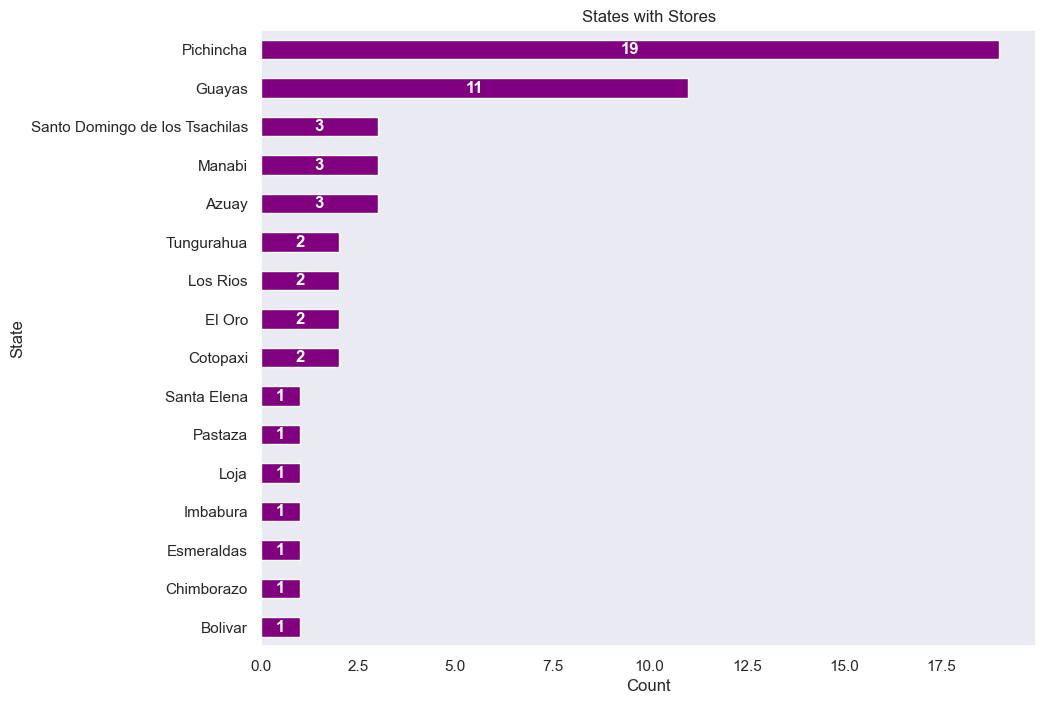

In [42]:
ax = grouped.plot(kind='barh', rot=0, figsize=(10,8), grid=False, color='purple')
ax.bar_label(ax.containers[0], label_type='center', color='white', weight='bold')

plt.title('States with Stores')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

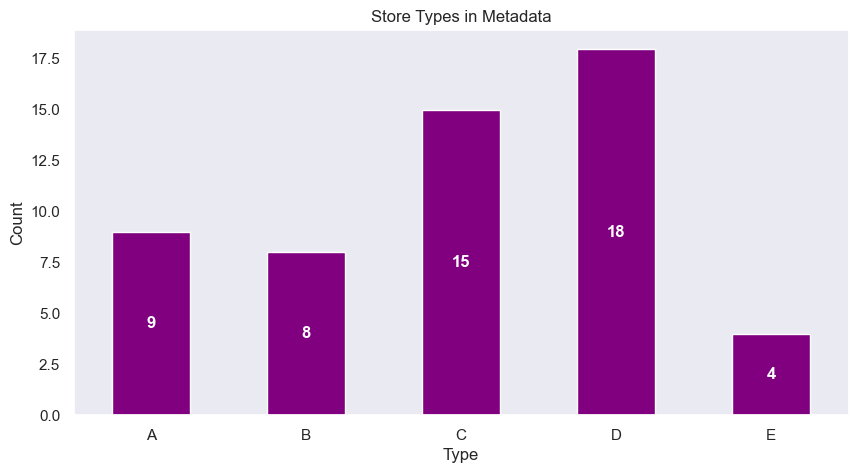

In [43]:
grouped = stores.groupby('type')['type'].count()

ax = grouped.plot(kind='bar', rot=0, figsize=(10,5), grid=False, color='purple')
ax.bar_label(ax.containers[0], label_type='center', color='white', weight='bold')

plt.title('Store Types in Metadata')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [44]:
oil

,date,dcoilwtico
0,01-01-2013,NaN
1,02-01-2013,93.14
2,03-01-2013,92.97
3,04-01-2013,93.12
4,07-01-2013,93.20
...,...,...
1213,25-08-2017,47.65
1214,28-08-2017,46.40
1215,29-08-2017,46.46
1216,30-08-2017,45.96


In [45]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [46]:
oil.fillna(value=0,inplace=True)
oil.head()

,date,dcoilwtico
0,01-01-2013,0.00
1,02-01-2013,93.14
2,03-01-2013,92.97
3,04-01-2013,93.12
4,07-01-2013,93.20


In [47]:
oil.date_val = pd.to_datetime(oil.date)
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1218 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


C:\Users\hp\AppData\Local\Temp\ipykernel_13220\3295940987.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  oil.date_val = pd.to_datetime(oil.date)
C:\Users\hp\AppData\Local\Temp\ipykernel_13220\3295940987.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  oil.date_val = pd.to_datetime(oil.date)


In [48]:
oil

,date,dcoilwtico
0,01-01-2013,0.00
1,02-01-2013,93.14
2,03-01-2013,92.97
3,04-01-2013,93.12
4,07-01-2013,93.20
...,...,...
1213,25-08-2017,47.65
1214,28-08-2017,46.40
1215,29-08-2017,46.46
1216,30-08-2017,45.96


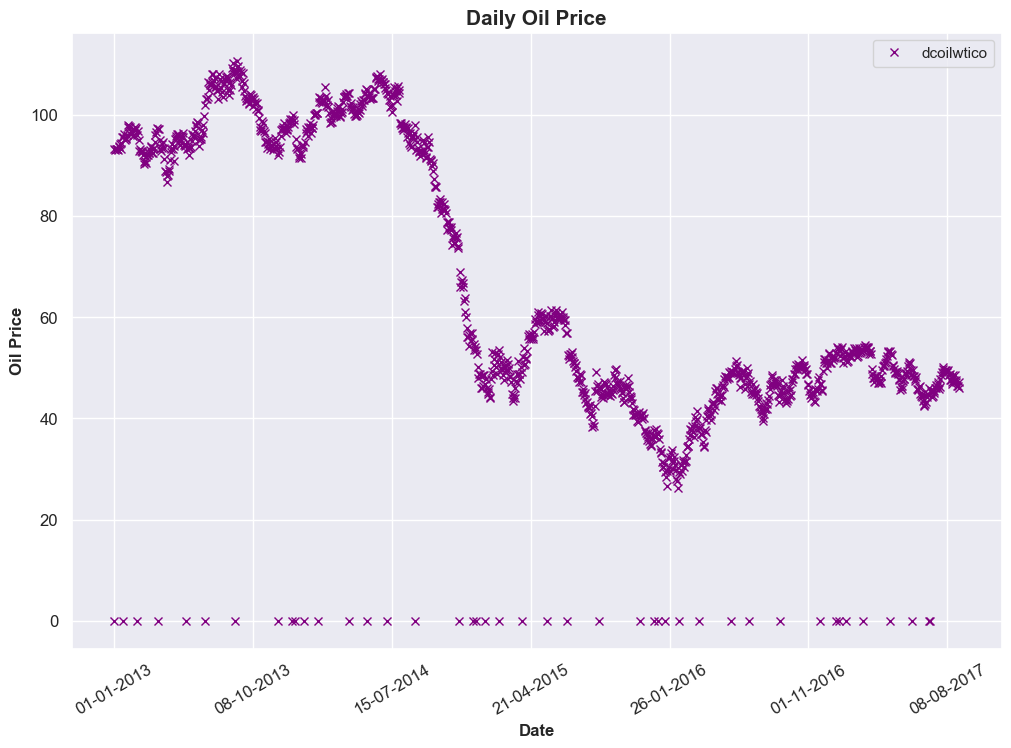

In [49]:
oil.plot(x='date', y='dcoilwtico', lw=0, marker='x', figsize=(12,8), rot=30, fontsize=12, color='purple')
plt.title('Daily Oil Price', fontsize=15, weight='bold')
plt.xlabel('Date', fontsize=12, weight='bold')
plt.ylabel('Oil Price', fontsize=12, weight='bold')
plt.show()

In [50]:
holidays_events

,date,type,locale,locale_name,description,transferred
0,02-03-2012,Holiday,Local,Manta,Fundacion de Manta,False
1,01-04-2012,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,12-04-2012,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,14-04-2012,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,21-04-2012,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,22-12-2017,Additional,National,Ecuador,Navidad-3,False
346,23-12-2017,Additional,National,Ecuador,Navidad-2,False
347,24-12-2017,Additional,National,Ecuador,Navidad-1,False
348,25-12-2017,Holiday,National,Ecuador,Navidad,False


In [51]:
holidays_grouped = holidays_events.groupby('type')['locale'].count()
holidays_grouped

type
Additional     51
Bridge          5
Event          56
Holiday       221
Transfer       12
Work Day        5
Name: locale, dtype: int64

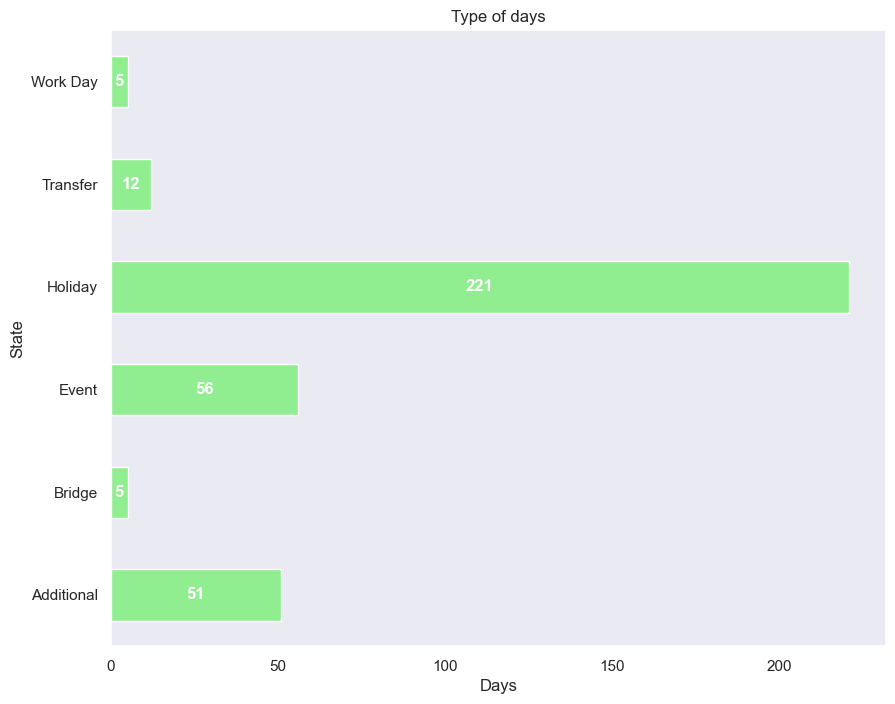

In [52]:
ax = holidays_grouped.plot(kind='barh', rot=0, figsize=(10,8), grid=False, color='lightgreen')
ax.bar_label(ax.containers[0], label_type='center', color='white', weight='bold')
plt.title('Type of days')
plt.xlabel('Days')
plt.ylabel('State')
plt.show()

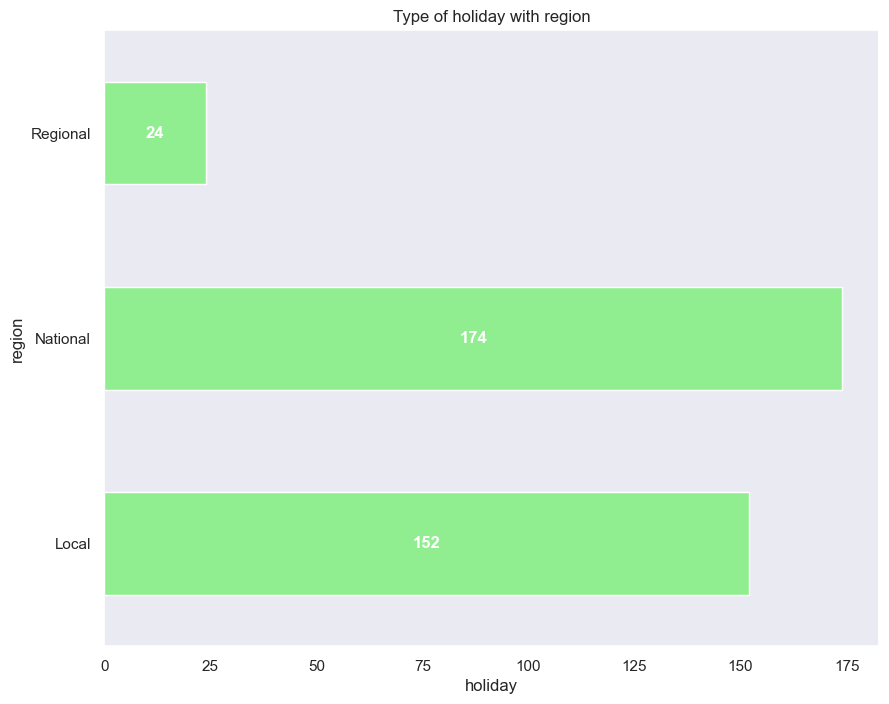

In [53]:
holidays_grouped1 = holidays_events.groupby('locale')['type'].count()

ax = holidays_grouped1.plot(kind='barh', rot=0, figsize=(10,8), grid=False, color='lightgreen')
ax.bar_label(ax.containers[0], label_type='center', color='white', weight='bold')
plt.title('Type of holiday with region')
plt.xlabel('holiday')
plt.ylabel('region')
plt.show()

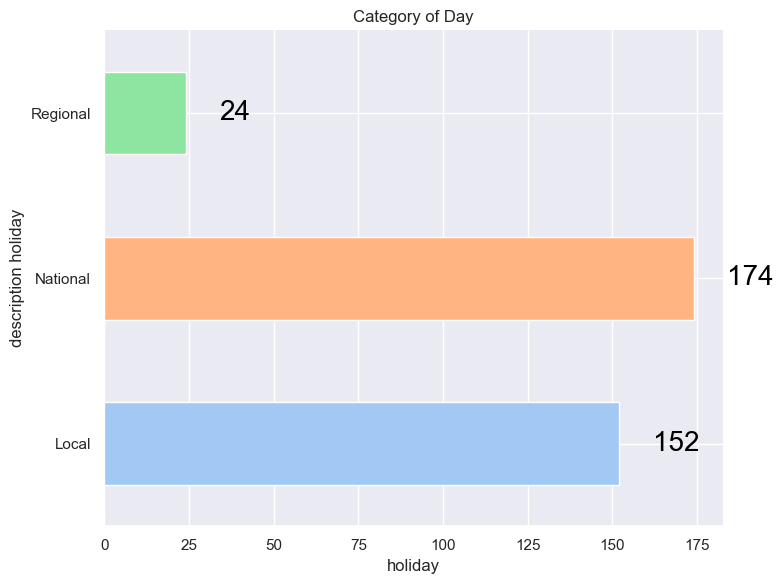

In [64]:
plt.figure(figsize=(8, 6))

colors = sns.color_palette('pastel', len(holidays_grouped1))

holidays_grouped1.plot(kind='barh', color=colors)
plt.ylabel('description holiday')
plt.xlabel('holiday')
plt.title('Category of Day')

for i, v in enumerate(holidays_grouped1):
    plt.text(v + 10, i, str(int(v)), color='black', va='center', fontsize=20)

sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


In [65]:
holidays_grouped3= holidays_events.groupby('description')['description'].count()
holidays_grouped3

description
Batalla de Pichincha                      5
Black Friday                              3
Cantonizacion de Cayambe                  6
Cantonizacion de El Carmen                6
Cantonizacion de Guaranda                 6
                                         ..
Traslado Fundacion de Quito               1
Traslado Independencia de Guayaquil       3
Traslado Primer Grito de Independencia    2
Traslado Primer dia del ano               1
Viernes Santo                             5
Name: description, Length: 103, dtype: int64

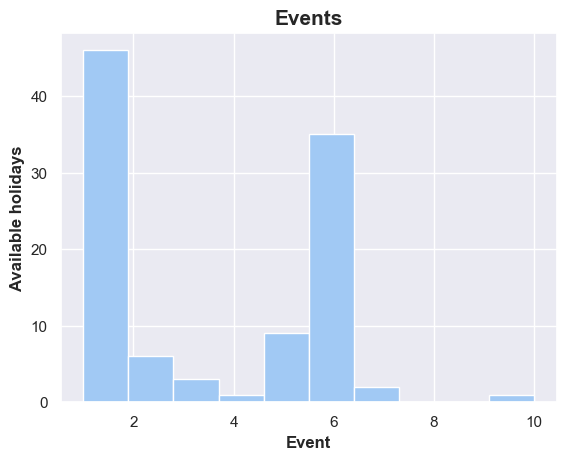

In [66]:
holidays_grouped3.plot(kind='hist',color=colors)
plt.title('Events', fontsize=15, weight='bold')
plt.xlabel('Event', fontsize=12, weight='bold')
plt.ylabel('Available holidays', fontsize=12, weight='bold')
plt.show()

In [74]:
total_sales=train.groupby(['date','store_nbr'])['sales'].sum().reset_index()


In [77]:
tempt=pd.merge(total_sales,transactions, how='left')
tempt

,date,store_nbr,sales,transactions
0,01-01-2013,1,0.000000,NaN
1,01-01-2013,2,0.000000,NaN
2,01-01-2013,3,0.000000,NaN
3,01-01-2013,4,0.000000,NaN
4,01-01-2013,5,0.000000,NaN
...,...,...,...,...
31770,31-12-2013,50,12378.411001,2889.0
31771,31-12-2013,51,15865.398000,2604.0
31772,31-12-2013,52,0.000000,NaN
31773,31-12-2013,53,0.000000,NaN


C:\Users\hp\AppData\Local\Temp\ipykernel_13220\3824385443.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ,tempt.corr('spearman').sales.loc['transactions'])


The correlation between total sales & transactions is: 0.8810354484263131


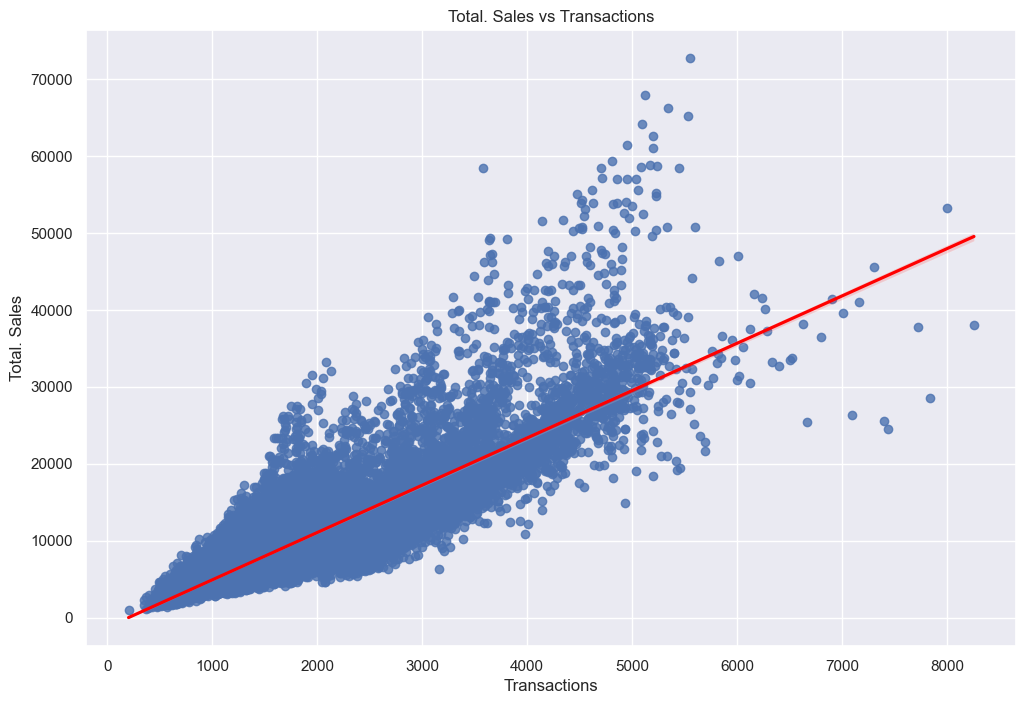

In [78]:
plt.figure(figsize=(12, 8))
sns.regplot(tempt,x='transactions',y='sales',line_kws={'color':'red',})
print('The correlation between total sales & transactions is:'
      ,tempt.corr('spearman').sales.loc['transactions'])
plt.xlabel('Transactions')
plt.ylabel('Total. Sales')
plt.title('Total. Sales vs Transactions')
plt.grid(True)
plt.show()